In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import pickle
import operator
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from scipy import stats

In [2]:
yearMap=OrderedDict()
yearMapRev=OrderedDict()
count=0
for year in range(1980,2018):
    yearMap[str(year)]=count
    yearMapRev[count]=str(year)
    count+=1
    
carbA=[6,41,53]
carbB=[9,10,23,24,25,34,36,42,44,50,11]

def setplot(plt,ax):

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax

def sortByValue(tempx):
    by_key = sorted(tempx.items(), key=lambda d: d[0])
    x = sorted(by_key, key=lambda d: d[1], reverse=True)
    return x

In [23]:
## Caliberate this for Figure 4 or 5 --> stateCodes Variable
## For z test only remove if stdPass==1:

stateCodes=pickle.load(open("stateCode.pickle","rb"))
# stateCodes=['CARBA','CARBB',"Others"]
paths=[str(i)+'/' for i in stateCodes]
# no 's' for CARBS while s for states
file='CorrelationsSummary/networkfeautures'

data=OrderedDict()

for path in paths:
    count=0
    f=open(path+file+".csv","r")
    for l in f:
        row=l.strip().split(",")
        if row[-1]=='float division by zero':
            n=0
            count+=1
        else:
            n=float(row[-1])
        year=row[0].split('/')[-1]
        if count<=20 and year in yearMap:
            key=path[:-1]
            if key not in data:
                data[key]=OrderedDict()
            data[key][yearMap[year]]=n


In [17]:
# For CARB-A, CARB-B and Others
stateCodes=['CARBA','CARBB',"Others"]


info=OrderedDict()
n=len(data)
skip=[72,2,78,15]
stateList=list(data.keys())
for i in range(n):
    for j in range(i+1,n):

                s1=data[stateList[i]]
                s2=data[stateList[j]]

                x1=np.mean([s1[k] for k in s1])
                x2=np.mean([s2[k] for k in s2])

                num=x1-x2
                var1=np.var([s1[k] for k in s1])
                n1=len([s1[k] for k in s1])
                var2=np.var([s2[k] for k in s2])
                n2=len([s2[k] for k in s2])
                denom=np.sqrt(var1/n1 + var2/n2)
                ttest=num/denom
                stateName1=stateList[i]
                stateName2=stateList[j]

                key1,key2=stateName1,stateName2
                if key1 not in info:
                    info[key1]=[0,0]
                if key2 not in info:
                    info[key2] = [0, 0]
                if -2.57<=ttest<=2.57:
                    info[key1][0]+=1
                    info[key2][0] += 1
                    print(ttest,"Accepted",key1,key2)
                else:
                    info[key1][1]+=1
                    info[key2][1] += 1
                    print('---->',ttest,"Rejected",key1,key2)


----> -20.5053313727 Rejected CARBA CARBB
----> 16.8251054328 Rejected CARBA Others
----> 31.0577353683 Rejected CARBB Others


CARBA LinregressResult(slope=0.00037300091202168041, intercept=0.46285452236876001, rvalue=0.1725597077577232, pvalue=0.30020562606817225, stderr=0.00035485837753998668)
0.469755039241 0.0237035306761 

CARBB LinregressResult(slope=-0.0013819805179190864, intercept=0.65491733063769275, rvalue=-0.3632961275877078, pvalue=0.02496679771508262, stderr=0.00059068201514480808)
0.629350691056 0.0417141784383 

Others LinregressResult(slope=-0.0026653176581747351, intercept=0.40225371536934401, rvalue=-0.82023280413416566, pvalue=2.9410934682422288e-10, stderr=0.00030979847982138409)
0.352945338693 0.0356331638436 



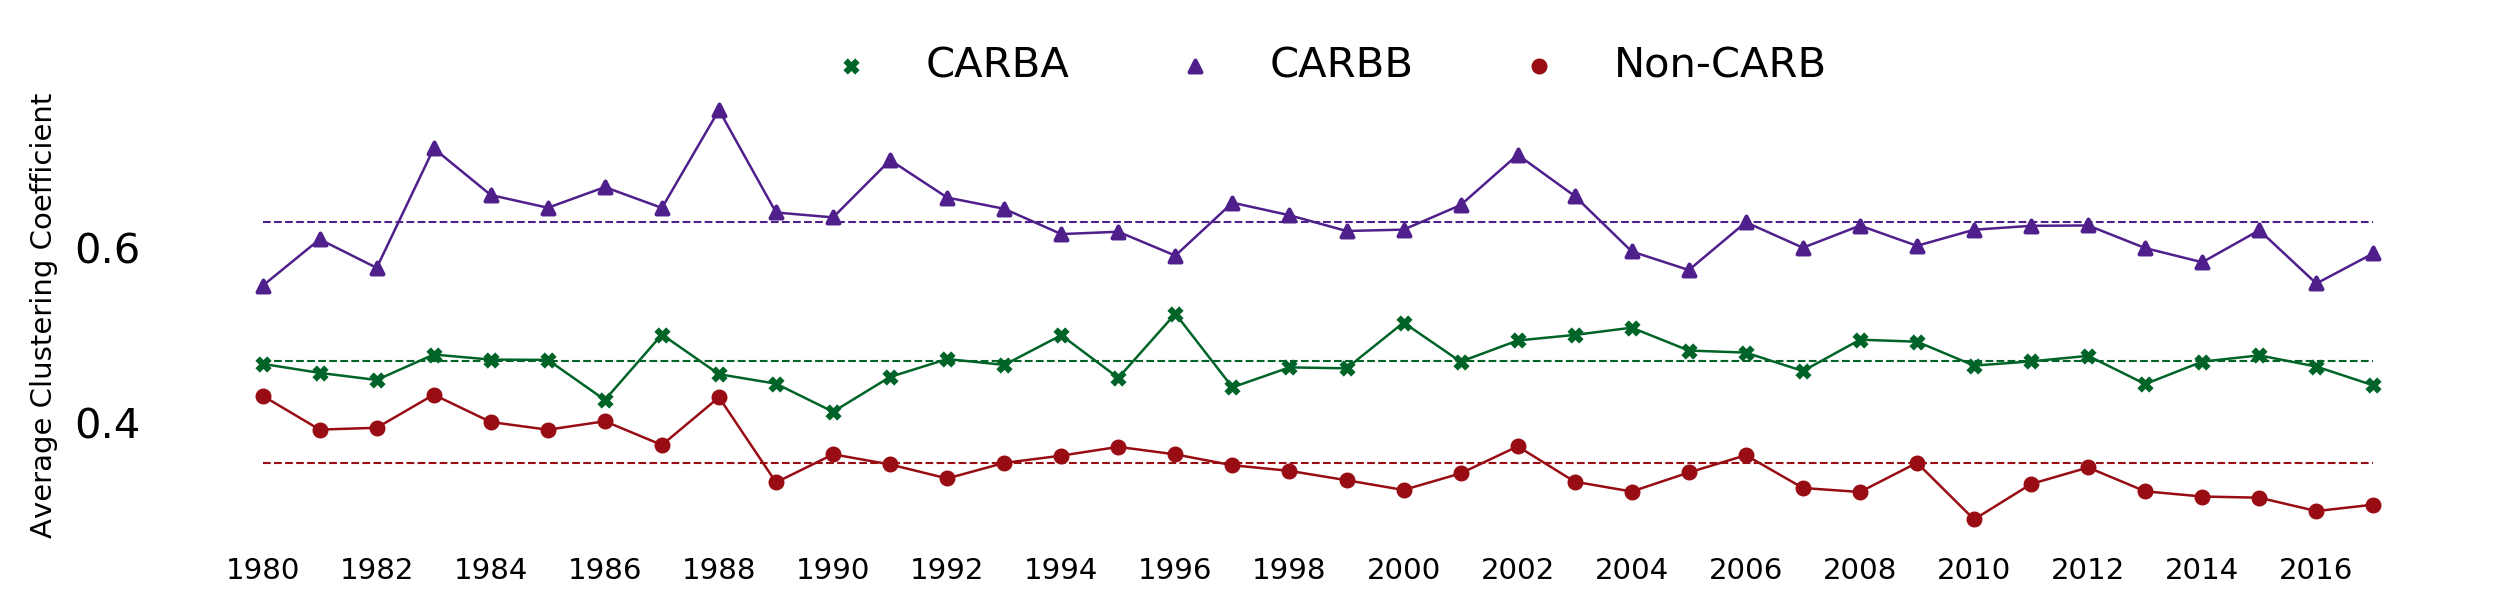

In [22]:
# Figure 4b

plt.close()
fig,ax=plt.subplots(figsize=(10,2),dpi=300)
plt,ax=setplot(plt,ax)
ax.tick_params(axis=u'both', which=u'both',length=0)

marker= ['x','^','o']
c1,c2,c3=plt.get_cmap('Greens'),plt.get_cmap('Purples'),plt.get_cmap('Reds')
color=[c1(0.9),c2(0.9),c3(0.9)]
for i in range(n):
    s1=data[stateList[i]]
    xx = [s1[k] for k in s1]
    mean = np.mean(xx)
    std = np.std(xx)
    plt.plot(xx,linewidth=0.6,color=color[i])
    plt.hlines(mean,0,37,linestyle="--",linewidth=0.5,color=color[i])
    plt.scatter(list(range(len(s1))),[s1[k] for k in s1],color=color[i],marker=marker[i],label=stateList[i].replace('Others','Non-CARB'),s=8)
    print(stateList[i],stats.linregress(list(range(len(s1))),xx))
    print(mean,std,'\n')
    
temp=list(range(1980,2018))
plt.ylabel('Average Clustering Coefficient',size=7)
plt.xticks(list(range(len(temp)))[::2],temp[::2],size=7)
plt.legend(loc='center',bbox_to_anchor=(0.5, 1.05),ncol=3,frameon=False)
plt.savefig('Com/images/Figure6b.png',bbox_inches='tight')
plt.show()

In [83]:
print(color)

[(0.96641291810841989, 0.98737408688965789, 0.95820069204152247, 1.0), (0.98663590926566713, 0.9825913110342176, 0.99117262591311039, 1.0), (0.99987697039600154, 0.95820069204152247, 0.9374855824682814, 1.0)]


In [37]:
# For state wise analysis
noState = ['"Guam"','"Puerto Rico"','"Hawaii"','"Virgin Islands"','"Alaska"','"Country Of Mexico"']
nonCarb = [i for i in stateCodes if i not in carbA+carbB and stateCodes[i] not in noState]

info=OrderedDict()
n=len(data)

skip=[72,2,78,15]
valid_set = carbA+carbB+nonCarb
n = len(valid_set)
# stateMatrix = np.nan((n,n))

stateMatrix = np.empty((n,n,))
stateMatrix[:] = np.nan
stateList=list(data.keys())
stateList = [i for i in stateList if int(i) in valid_set]
for i in range(n):
    for j in range(i+1,n):
        if int(stateList[i]) in valid_set and int(stateList[j]) in valid_set:
#             if (int(stateList[i]) in carbA+carbB and int(stateList[j]) not in carbA+carbB) \
#             or (int(stateList[i]) not in carbA+carbB and int(stateList[j]) in carbA+carbB):
                s1=data[stateList[i]]
                s2=data[stateList[j]]

                x1=np.mean([s1[k] for k in s1])
                x2=np.mean([s2[k] for k in s2])

                num=x1-x2
                var1=np.var([s1[k] for k in s1])
                n1=len([s1[k] for k in s1])
                var2=np.var([s2[k] for k in s2])
                n2=len([s2[k] for k in s2])
                denom=np.sqrt(var1/n1 + var2/n2)
                ttest=num/denom
                stateName1=stateCodes[int(stateList[i])]
                stateName2=stateCodes[int(stateList[j])]
                
                fstat = var1/var2 if var1>=var2 else var2/var1
                # print(fstat)
                stdPass = 1 if -2.11<=fstat <=2.11 else 0 # Ftest at 99% CI

                key1,key2=int(stateList[i]),int(stateList[j])
                if key1 not in info:
                    info[key1]=[0,0]
                if key2 not in info:
                    info[key2] = [0, 0]
                if -2.57<=ttest<=2.57: # 99 z test
                    #if stdPass==1:
                        # similar
                        info[key1][0]+=1
                        info[key2][0] += 1
                        if (int(stateList[i])) in carbA+carbB and int(stateList[j]) in carbA+carbB:
                            stateMatrix[i,j]=0.85
                            stateMatrix[j,i]=0.85
                        elif (int(stateList[i])) not in carbA+carbB and int(stateList[j]) not in carbA+carbB:
                            stateMatrix[i,j]=-0.75
                            stateMatrix[j,i]=-0.75 
                        else:
                            stateMatrix[i,j]=-0.1
                            stateMatrix[j,i]=-0.1

                        print(ttest,"Accepted",stateCodes[int(stateList[i])],stateCodes[int(stateList[j])])
#                     else:
#                         # Disimilar
#                         info[key1][1]+=1
#                         info[key2][1] += 1
#                         stateMatrix[i,j]=np.nan
#                         stateMatrix[j,i]=np.nan
                        
                else:
                    # dissimilar
                    info[key1][1]+=1
                    info[key2][1] += 1
                    stateMatrix[i,j]=np.nan
                    stateMatrix[j,i]=np.nan
                    #print('---->',ttest,"Rejected",stateCodes[int(stateList[i])],stateCodes[int(stateList[j])])


2.18953793589 Accepted "Alabama" "Arizona"
1.94414515856 Accepted "Alabama" "Arkansas"
0.197709306571 Accepted "Alabama" "Colorado"
2.24223794421 Accepted "Alabama" "District Of Columbia"
-1.98958819145 Accepted "Alabama" "Georgia"
0.705752509003 Accepted "Alabama" "Indiana"
-1.35011793806 Accepted "Alabama" "Iowa"
-1.40269571556 Accepted "Alabama" "Kentucky"
-2.51588770899 Accepted "Alabama" "Minnesota"
-0.772746410272 Accepted "Alabama" "Mississippi"
-0.266597605508 Accepted "Alabama" "Missouri"
1.19206293956 Accepted "Alabama" "Nevada"
-1.18317389246 Accepted "Alabama" "New Hampshire"
-2.13792307745 Accepted "Alabama" "New Mexico"
0.407955664274 Accepted "Alabama" "North Carolina"
-1.51435340909 Accepted "Alabama" "Oregon"
1.74528179841 Accepted "Alabama" "Rhode Island"
2.11355745417 Accepted "Alabama" "Utah"
0.559744588923 Accepted "Alabama" "Virginia"
1.27590061095 Accepted "Alabama" "West Virginia"
1.2791866055 Accepted "Alabama" "Wisconsin"
1.38057828018 Accepted "Arizona" "Arka

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in double_scalars
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


"Colorado" "New Hampshire"
-1.77051785974 Accepted "Colorado" "New Mexico"
1.95054651927 Accepted "Colorado" "New York"
0.103970913277 Accepted "Colorado" "North Carolina"
-1.31061029681 Accepted "Colorado" "Oregon"
1.68510401348 Accepted "Colorado" "Rhode Island"
-2.04404876767 Accepted "Colorado" "South Carolina"
1.67801315729 Accepted "Colorado" "Tennessee"
1.88982903188 Accepted "Colorado" "Utah"
0.448629788059 Accepted "Colorado" "Virginia"
1.18956062447 Accepted "Colorado" "West Virginia"
1.17104702684 Accepted "Colorado" "Wisconsin"
-0.954859510367 Accepted "Connecticut" "Delaware"
-1.93156969909 Accepted "Connecticut" "Maryland"
1.31563623776 Accepted "Connecticut" "Nebraska"
-2.13206601083 Accepted "Connecticut" "New Jersey"
1.16778687495 Accepted "Connecticut" "North Dakota"
-0.290914572683 Accepted "Delaware" "Maryland"
1.67452097124 Accepted "Delaware" "Nebraska"
-0.237971043863 Accepted "Delaware" "New Jersey"
1.58820108299 Accepted "Delaware" "North Dakota"
2.53506056992 

In [14]:
data.keys()

odict_keys(['1', '2', '4', '5', '6', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '66', '72', '78', '80'])

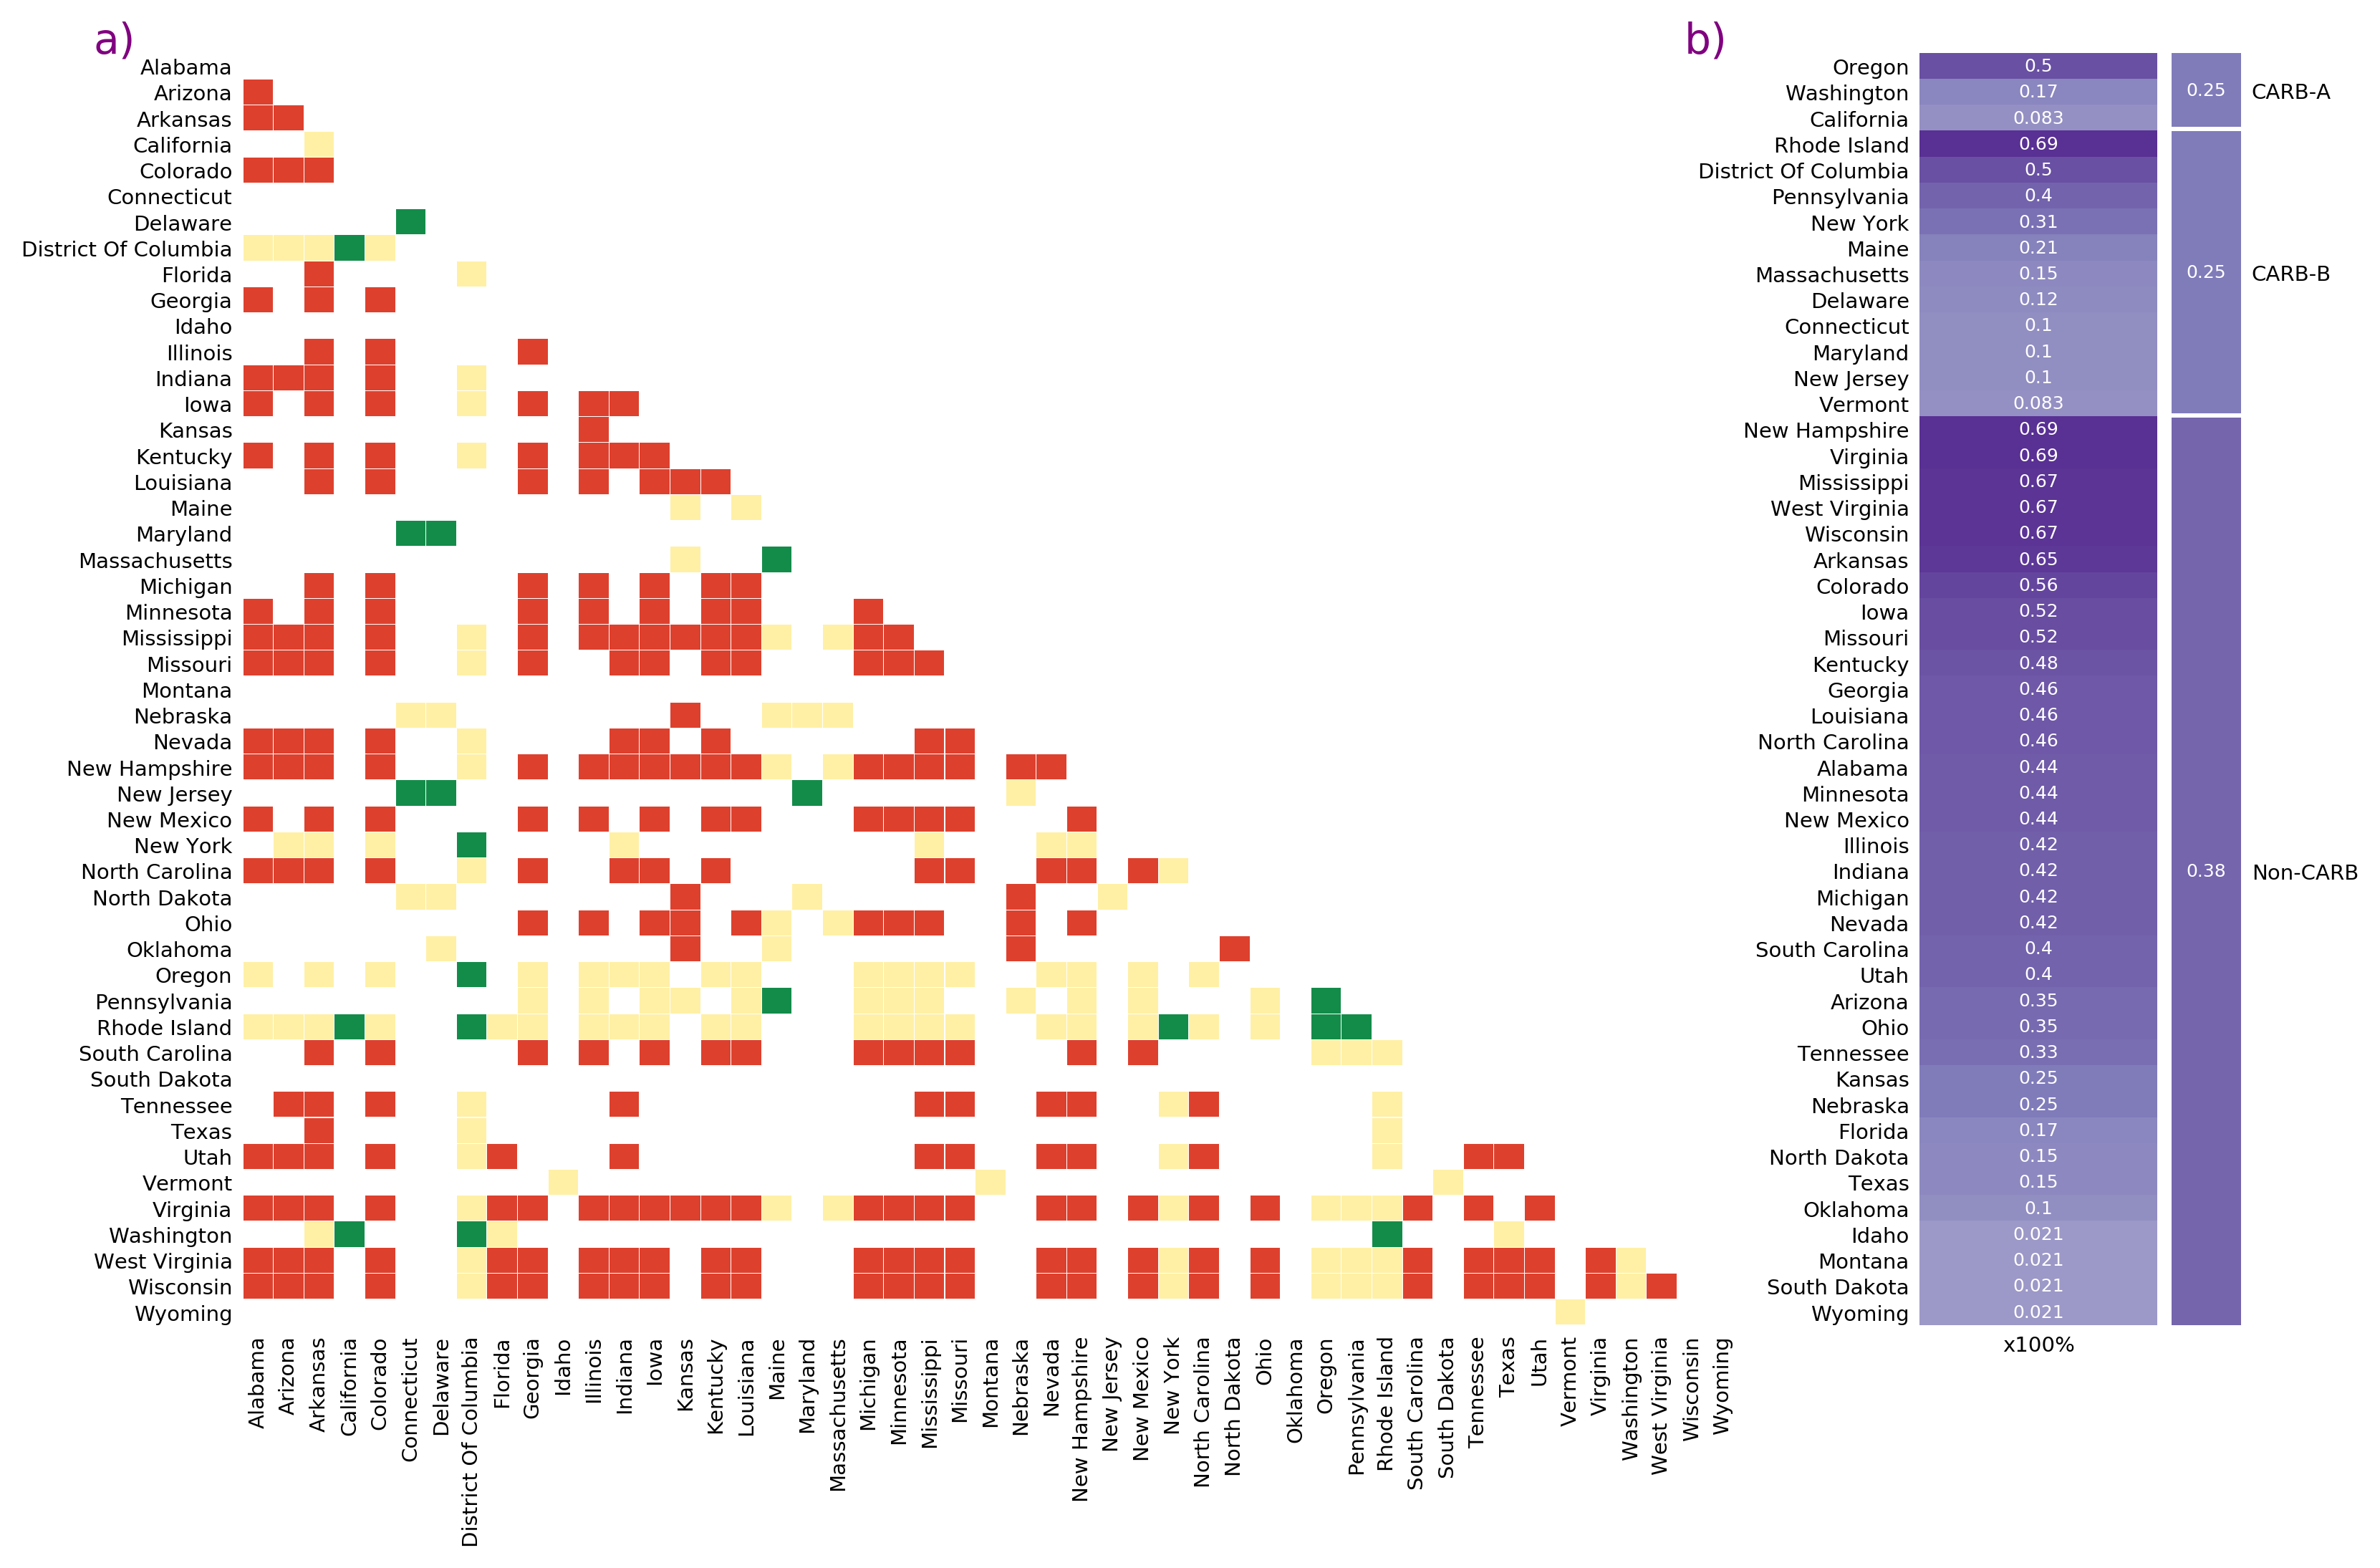

In [38]:
# Figure 5
r =plt.get_cmap("Reds")
b = plt.get_cmap("Blues")
g = plt.get_cmap("Greens")

flatui = [r(0.9),g(0.9), b(0.9)]
cmap = sns.palplot(sns.color_palette(flatui))

plt.close()
plt.subplots(figsize=(12,8),dpi=300)
gs = gridspec.GridSpec(len(info)+1,24)   

ax=plt.subplot(gs[0:len(info),0:18])
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(-0.1, 1, 'a)', transform=ax.transAxes, size=14,color='purple')

mask = np.zeros_like(stateMatrix)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(stateMatrix,cmap=plt.get_cmap("RdYlGn"),mask=mask,linewidth=0.01,vmax=1,vmin=-1,cbar=False,cbar_kws={"shrink": 0.5,"orientation": "horizontal"})
series=list(range(n))
plt.yticks(list(map(lambda x:x+0.5,series)),[stateCodes[int(stateList[i])].replace('"','') for i in series],rotation=0,size=7)
plt.xticks(list(map(lambda x:x+0.5,series)),[stateCodes[int(stateList[i])].replace('"','') for i in series],rotation=90,size=7)
plt.xlabel('')

# b

ax=plt.subplot(gs[0:len(info),20:23])
ax.text(-0.99, 1, 'b)', transform=ax.transAxes, size=14,color='purple')

similar={}
for state in info:
    similar[state]=(info[state][0]*100)/(info[state][0]+info[state][1])

s=sorted(similar.items(),key=operator.itemgetter(1),reverse=True)
    

## PreP
tempx={}
for i in similar:
    intI = int(i)
    if intI in carbA:
        key='CARB-A'
    elif intI in carbB:
        key='CARB-B'
    elif intI in nonCarb:
        key='Non-CARB'
    if intI in carbA+carbB+nonCarb:   
        if key not in tempx:
            tempx[key]={}
        tempx[key][intI]=similar[i]/100
        
x1 = sortByValue(tempx['CARB-A'])
x2 = sortByValue(tempx['CARB-B'])
x3 = sortByValue(tempx['Non-CARB'])

corList = [[i[1]]for i in x1]
corList.extend([[i[1]]for i in x2])
corList.extend([[i[1]]for i in x3])

xticks = [i[0]for i in x1]
xticks.extend([i[0] for i in x2])
xticks.extend([i[0] for i in x3])
xticks = [stateCodes[i].replace('"','') for i in xticks]
## PreP ends


cmap =plt.get_cmap('Purples')
ax.tick_params(axis=u'both', which=u'both',length=0)

sns.heatmap(corList,cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":6})
plt.yticks(list(map(lambda x:x+0.5,range(len(s)))),xticks,rotation=0,size=7)
plt.xticks([0.5],['x100%'],size=7)

## c
carbAmean,carbBmean,carbOthersmean = getmean(similar)
t=[[carbAmean/100],[carbBmean/100],[carbOthersmean/100]]

ax=plt.subplot(gs[0:len(carbA),23:24])
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap([t[0]],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":6})
plt.xticks([])
ax.yaxis.tick_right()
plt.yticks([0.5],['CARB-A'],size=7,rotation=0)

ax=plt.subplot(gs[len(carbA):len(carbA)+len(carbB),23:24])
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap([t[1]],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":6})
plt.xticks([])
ax.yaxis.tick_right()
plt.yticks([0.5],['CARB-B'],size=7,rotation=0)

ax=plt.subplot(gs[len(carbA)+len(carbB):len(carbA)+len(carbB)+len(nonCarb),23:24])
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap([t[2]],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":6})
plt.xticks([])
ax.yaxis.tick_right()
plt.yticks([0.5],['Non-CARB'],size=7,rotation=0)

# plt.tight_layout()
plt.savefig('Com/images/SFigure6_sup.png',bbox_inches='tight')
plt.show()

"Missouri" 33.333333333333336
"Georgia" 25.0
"Oregon" 25.0
"Kentucky" 22.916666666666668
"Minnesota" 22.916666666666668
"New Mexico" 22.916666666666668
"Michigan" 20.833333333333332
"Louisiana" 18.75
"North Carolina" 18.75
"South Carolina" 18.75
"Alabama" 16.666666666666668
"Pennsylvania" 16.666666666666668
"Indiana" 14.583333333333334
"Colorado" 12.5
"Ohio" 12.5
"Iowa" 10.416666666666666
"Arkansas" 8.333333333333334
"Illinois" 8.333333333333334
"Nevada" 8.333333333333334
"Tennessee" 8.333333333333334
"West Virginia" 8.333333333333334
"Wisconsin" 8.333333333333334
"Arizona" 6.25
"Kansas" 6.25
"Maine" 6.25
"New Hampshire" 6.25
"New York" 6.25
"North Dakota" 6.25
"Oklahoma" 6.25
"Rhode Island" 6.25
"Utah" 6.25
"Delaware" 4.166666666666667
"District Of Columbia" 4.166666666666667
"Mississippi" 4.166666666666667
"Nebraska" 4.166666666666667
"New Jersey" 4.166666666666667
"Virginia" 4.166666666666667
"Washington" 4.166666666666667
"Connecticut" 2.0833333333333335
"Maryland" 2.08333333333333

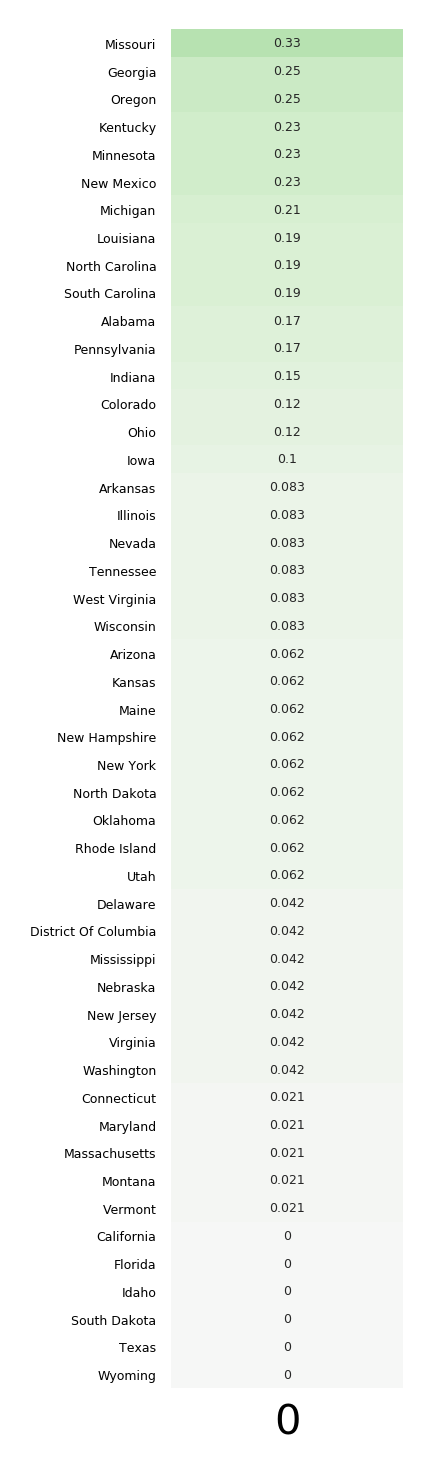

In [33]:
similar={}
for state in info:
    similar[state]=(info[state][0]*100)/(info[state][0]+info[state][1])

s=sorted(similar.items(),key=operator.itemgetter(1),reverse=True)
for st in s:
    print(stateCodes[st[0]],st[1])
    
cmap =plt.get_cmap('PRGn')
plt.close()
fig,ax=plt.subplots(figsize=(1,6),dpi=300) 

ax.tick_params(axis=u'both', which=u'both',length=0)

sns.heatmap([[i[1]/100] for i in s],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":3})
plt.yticks(list(map(lambda x:x+0.5,range(len(s)))),[stateCodes[i[0]].replace('"','') for i in s],rotation=0,size=3)
plt.show()

In [6]:
def getmean(similar):    
    carbAmean=np.mean([similar[stateC] for stateC in similar if stateC in carbA])
    carbAstd=np.std([similar[stateC] for stateC in similar if stateC in carbA])

    carbBmean=np.mean([similar[stateC] for stateC in similar if stateC in carbB])
    carbBstd=np.std([similar[stateC] for stateC in similar if stateC in carbB])

    carbOthersmean=np.mean([similar[stateC] for stateC in similar if stateC not in carbA+carbB])
    carbOthersstd=np.std([similar[stateC] for stateC in similar if stateC not in carbA+carbB])
    return carbAmean,carbBmean,carbOthersmean

In [34]:
carbAmean=np.mean([similar[stateC] for stateC in similar if stateC in carbA])
carbAstd=np.std([similar[stateC] for stateC in similar if stateC in carbA])

carbBmean=np.mean([similar[stateC] for stateC in similar if stateC in carbB])
carbBstd=np.std([similar[stateC] for stateC in similar if stateC in carbB])

carbOthersmean=np.mean([similar[stateC] for stateC in similar if stateC not in carbA+carbB])
carbOthersstd=np.std([similar[stateC] for stateC in similar if stateC not in carbA+carbB])


In [101]:
print("CARB-A",carbAmean,'+-',carbAstd)
print("CARB-B",carbBmean,'+-',carbBstd)
print("Others",carbOthersmean,'+-',carbOthersstd)

CARB-A 18.9189189189 +- 21.0510296316
CARB-B 15.7248157248 +- 15.1499656113
Others 16.4092664093 +- 9.37437107504


In [150]:
print("CARB-A",carbAmean,'+-',carbAstd)
print("CARB-B",carbBmean,'+-',carbBstd)
print("Others",carbOthersmean,'+-',carbOthersstd)

CARB-A 26.0 +- 17.2819751958
CARB-B 32.5454545455 +- 23.5115586134
Others 43.3513513514 +- 22.0763003856


In [157]:
print("CARB-A",carbAmean,'+-',carbAstd)
print("CARB-B",carbBmean,'+-',carbBstd)
print("Others",carbOthersmean,'+-',carbOthersstd)

CARB-A 18.6666666667 +- 13.6950923894
CARB-B 15.8181818182 +- 12.575721066
Others 27.0810810811 +- 16.0983100983


In [36]:
print("CARB-A",carbAmean,'+-',carbAstd)
print("CARB-B",carbBmean,'+-',carbBstd)
print("Others",carbOthersmean,'+-',carbOthersstd)

CARB-A 9.72222222222 +- 10.9361220472
CARB-B 5.11363636364 +- 4.00871410767
Others 10.6547619048 +- 8.35965231622


In [27]:
for state in info:
    key = info[state]
    print(stateCodes[state],key[0])

"Alabama" 8
"Arizona" 3
"Arkansas" 4
"California" 0
"Colorado" 6
"Connecticut" 1
"Delaware" 2
"District Of Columbia" 2
"Florida" 0
"Georgia" 12
"Idaho" 0
"Illinois" 4
"Indiana" 7
"Iowa" 5
"Kansas" 3
"Kentucky" 11
"Louisiana" 9
"Maine" 3
"Maryland" 1
"Massachusetts" 1
"Michigan" 10
"Minnesota" 11
"Mississippi" 2
"Missouri" 16
"Montana" 1
"Nebraska" 2
"Nevada" 4
"New Hampshire" 3
"New Jersey" 2
"New Mexico" 11
"New York" 3
"North Carolina" 9
"North Dakota" 3
"Ohio" 6
"Oklahoma" 3
"Oregon" 12
"Pennsylvania" 8
"Rhode Island" 3
"South Carolina" 9
"South Dakota" 0
"Tennessee" 4
"Texas" 0
"Utah" 3
"Vermont" 1
"Virginia" 2
"Washington" 2
"West Virginia" 4
"Wisconsin" 4
"Wyoming" 0


In [28]:
sns.heatmap?

In [16]:
a[0,1]=1

In [17]:
a

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])